In [11]:
## Differrents libs for the project 
import random
import pandas as pd
from PIL import Image
from cv2 import imread
import os
import matplotlib.pyplot as plt


In [36]:
train_set = pd.read_csv('training_solutions_rev1.csv')
img_path = "images_training_rev1"
files = os.listdir(img_path)

train_set.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [37]:
##Combien y-a-t-il d'exemples ? Quelles sont les classes ? Sont-elles équilibrées ?
train_set

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


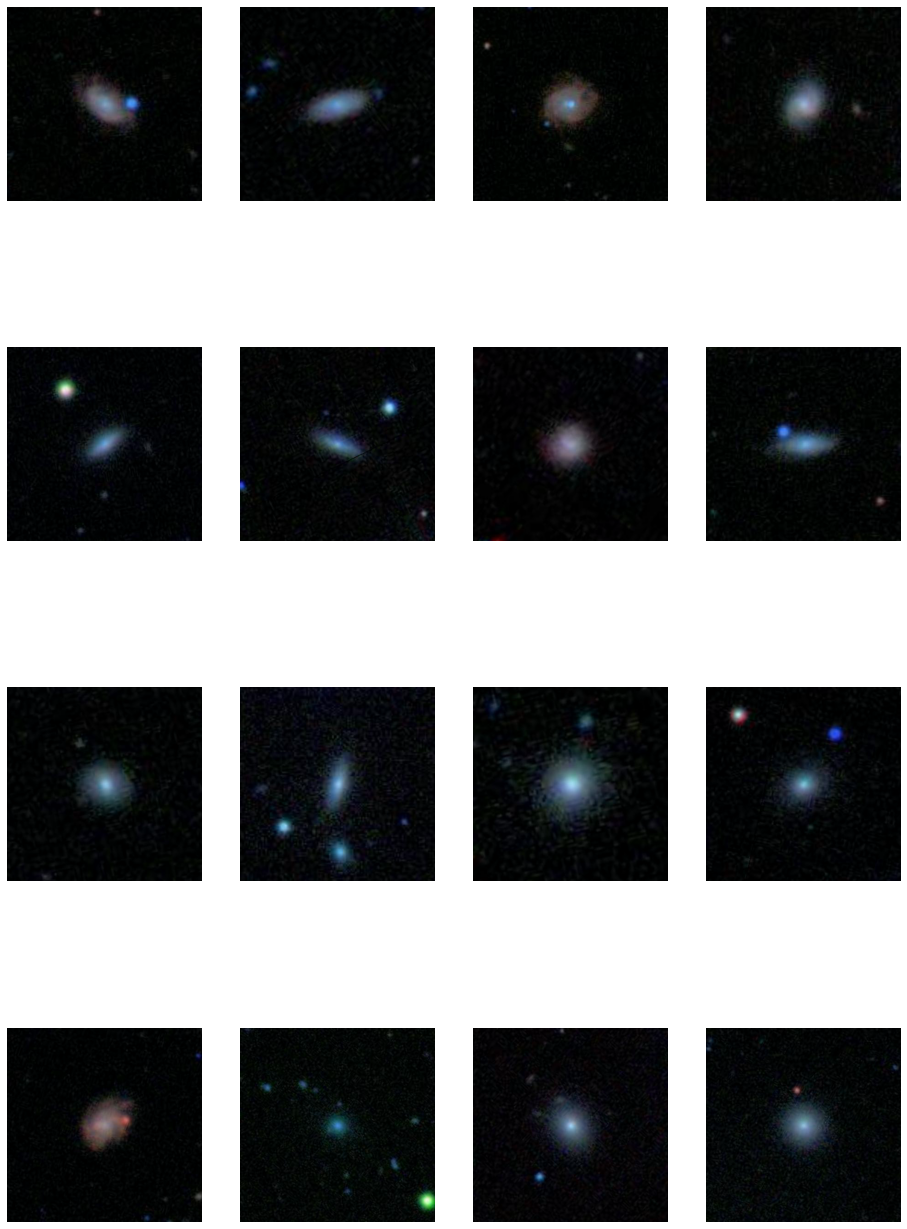

In [38]:
plt.figure(1, figsize=(16, 24))
plt.axis('off')
n = 0
for i in range(16):
    n += 1
    random_img = './images_training_rev1/'+random.choice(files)
    imgs = imread(random_img)
    plt.subplot(4, 4, n)
    plt.axis('off')
    plt.imshow(imgs)

plt.show()

# On divise le dataset en 3 classe préalablement observées 
-Smooth <br>
-Disk <br>
-Artefact <br>

In [39]:
sample1 = train_set.sort_values(by='Class1.1', ascending=False).head(100).copy()
sample2 = train_set.sort_values(by='Class1.2', ascending=False).head(100).copy()
sample3 = train_set.sort_values(by='Class1.3', ascending=False).head(100).copy()

# Resize des images 

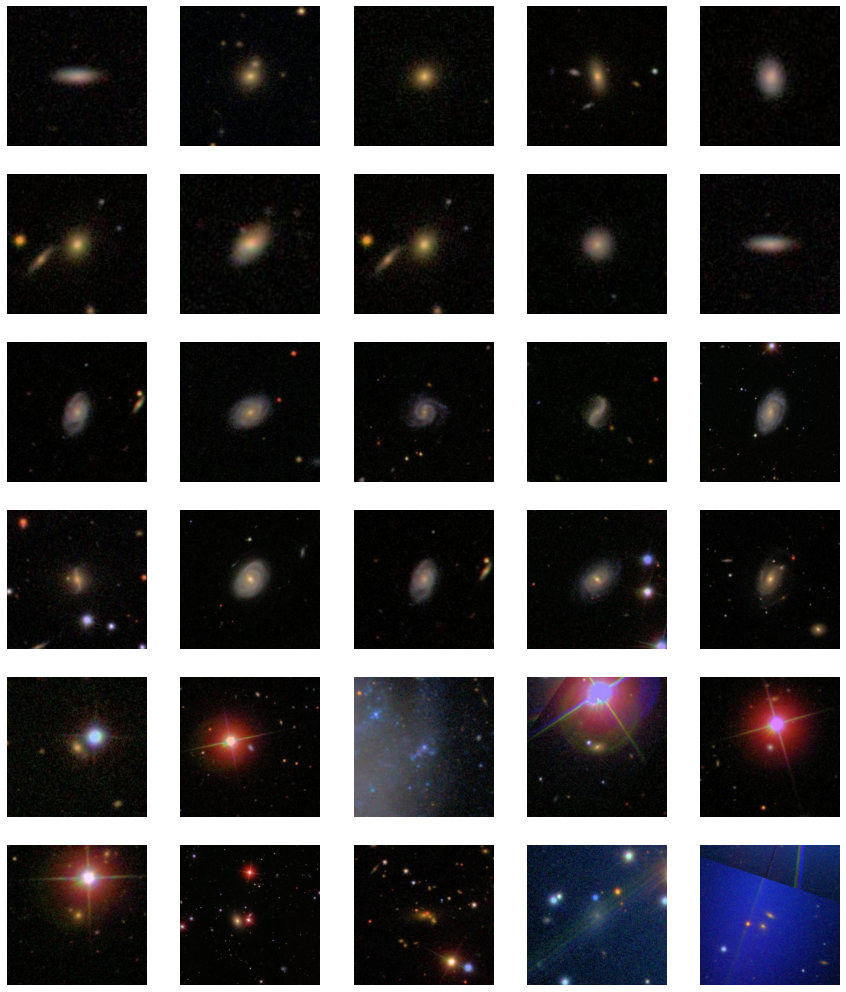

In [45]:
fig = plt.figure(figsize=(15,18))
    
for i in range(10):
    fig.add_subplot(6,5,i+1)
    n = random.randint(0,100)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample1.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+11)
    n = random.randint(0,100)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample2.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+21)
    n = random.randint(0,100)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample3.GalaxyID.values[n])+'.jpg'))